In [ ]:
import nump as np
imp
from pyIslam.baselib import dcos, dsin
from math import atan, pi
from 

        self._conf = conf
        MAKKAH_LATI = 21.42249   # latitude taken from maps.google.com
        MAKKAH_LONG = 39.826174  # longitude taken from maps.google.com
        lamda = MAKKAH_LONG - self._conf.longitude
        num = dcos(MAKKAH_LATI) * dsin(lamda)
        denom = (dsin(MAKKAH_LATI) * dcos(self._conf.latitude)
                 - dcos(MAKKAH_LATI) * dsin(self._conf.latitude)
                 * dcos(lamda))
        self._qiblah_dir = (180 / pi) * atan(num / denom)
        
        # Needs a check!
        if denom < 0:
            self._qiblah_dir = 180 + self._qiblah_dir
        if denom > 0 and num < 0:
            self._qiblah_dir = 360 + self._qiblah_dir

        return self._qiblah_dir
        six = str(int(self._qiblah_dir)) + '°'
        self._qiblah_dir = (self._qiblah_dir - int(self._qiblah_dir)) * 60
        six = six + " " + str(int(self._qiblah_dir)) + "'"
        self._qiblah_dir = (self._qiblah_dir - int(self._qiblah_dir)) * 60
        six = six + " " + str(int(self._qiblah_dir)) + "''"
        self._qiblah_dir = (self._qiblah_dir - int(self._qiblah_dir)) * 60
        return six

In [8]:
import math

def qibla_direction(lat, lon):
    # Convert degrees to radians
    lat1 = math.radians(lat)
    lon1 = math.radians(lon)
    lat2 = math.radians(21.4225)  # Kaaba
    lon2 = math.radians(39.8262)  # Kaaba

    delta_lon = lon2 - lon1

    x = math.sin(delta_lon) * math.cos(lat2)
    y = math.cos(lat1) * math.sin(lat2) - \
        math.sin(lat1) * math.cos(lat2) * math.cos(delta_lon)

    theta = math.atan2(x, y)
    bearing = (math.degrees(theta) + 360) % 360

    return bearing  # in degrees


In [14]:
import plotly.graph_objects as go
import numpy as np

def rotate_shape(x, y, angle_rad):
    """Rotate shape (x, y) around origin (0, 0)."""
    x_rot = []
    y_rot = []
    for xi, yi in zip(x, y):
        x_rot.append(xi * np.cos(angle_rad) - yi * np.sin(angle_rad))
        y_rot.append(xi * np.sin(angle_rad) + yi * np.cos(angle_rad))
    return x_rot, y_rot

def draw_plane_with_arrow(relative_angle_deg, plane_heading_deg=0, arrow_length=2):
    # Plane outline (top-down, wireframe, pointing up)
    plane_x = [ 0,  0.2,  0.2,  0.6,  0.6,  0.2,  0.2,  0.5,  0.5,  0.2,
                0.2, -0.2, -0.2, -0.5, -0.5, -0.2, -0.2, -0.6, -0.6, -0.2, -0.2,  0]
    plane_y = [ 1,  0.6,  0.3,  0.2, -0.2, -0.3, -0.6, -0.6, -0.8, -0.8,
               -0.6, -0.6, -0.8, -0.8, -0.6, -0.6, -0.3, -0.2,  0.2,  0.3,  0.6, 1]

    # Rotate plane outline by heading
    heading_rad = np.radians(plane_heading_deg)
    plane_x_rot, plane_y_rot = rotate_shape(plane_x, plane_y, heading_rad)

    # Total arrow angle in global frame (0° = up)
    total_angle_rad = np.radians(plane_heading_deg + relative_angle_deg)
    arrow_dx = arrow_length * np.sin(total_angle_rad)
    arrow_dy = arrow_length * np.cos(total_angle_rad)

    # Arrow start (nose of plane) and end
    x_start, y_start = 0, 0
    x_end = x_start + arrow_dx
    y_end = y_start + arrow_dy

    fig = go.Figure()

    # Plane wireframe
    fig.add_trace(go.Scatter(
        x=plane_x_rot,
        y=plane_y_rot,
        mode='lines',
        line=dict(color='black', width=2),
        name='Plane Outline'
    ))

    # Arrow
    fig.add_annotation(
        x=x_end, y=y_end,
        ax=x_start, ay=y_start,
        xref='x', yref='y',
        axref='x', ayref='y',
        showarrow=True,
        arrowhead=3,
        arrowsize=1.5,
        arrowwidth=2,
        arrowcolor='red'
    )

    # Angle label near the arrow tip
    label_offset = 0.2
    fig.add_trace(go.Scatter(
        x=[x_end + label_offset],
        y=[y_end + label_offset],
        mode='text',
        text=[f"{relative_angle_deg}°"],
        textposition='top center',
        textfont=dict(size=14, color='red'),
        showlegend=False
    ))

    fig.update_layout(
        title=f"Arrow at {relative_angle_deg}° relative to plane heading {plane_heading_deg}° (0° = Up)",
        xaxis=dict(scaleanchor='y', scaleratio=1, visible=False),
        yaxis=dict(visible=False),
        showlegend=False,
        width=600,
        height=600,
    )

    fig.show()


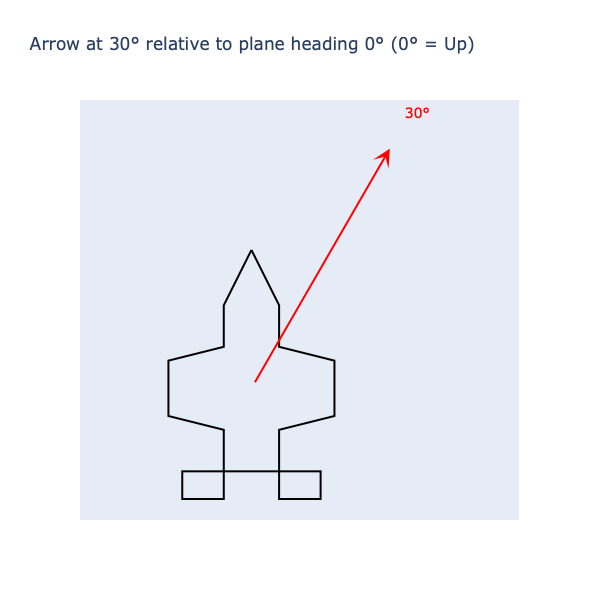

In [17]:
draw_plane_with_arrow(30, plane_heading_deg=0)

In [2]:
import numpy as np

In [9]:
qibla_direction(43.65, -79.34)

54.61202981367467

In [13]:
print(qibla_direction(43.65107, -79.347015))  # Output: ~ 49.1 degrees


54.60689638760914


In [14]:
# Islamabad 143.33
#33, 73


print(qibla_direction(33.693, 73.114))  # Output: ~ 49.1 degrees


255.95698314874608


In [15]:
360-255

105